In [57]:
import pandas as pd
import os
import torch
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image

In [58]:
df = pd.read_csv('list_attribute.txt', delim_whitespace=True, index_col=0)
image_files = os.listdir('images/')
filtered_df = df[df.index.isin(image_files)]
filtered_df

/tmp/ipykernel_5912/2986566526.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('list_attribute.txt', delim_whitespace=True, index_col=0)


,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
000051.jpg,1,-1,-1,1,1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
000052.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
000065.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
000166.jpg,1,-1,-1,-1,-1,-1,-1,1,-1,-1,...,1,-1,-1,-1,-1,1,-1,-1,-1,-1
000198.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202320.jpg,-1,1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,1,-1,-1,1,-1,-1,1
202340.jpg,-1,-1,1,-1,-1,-1,-1,-1,1,-1,...,-1,1,1,-1,-1,-1,1,-1,-1,1
202347.jpg,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,1,-1,-1,1
202357.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,-1,1


In [59]:
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(256),
        transforms.RandomRotation(45),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_transforms


{'train': Compose(
     Resize(size=256, interpolation=bilinear, max_size=None, antialias=True)
     RandomRotation(degrees=[-45.0, 45.0], interpolation=nearest, expand=False, fill=0)
     RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
     RandomHorizontalFlip(p=0.5)
     ToTensor()
     Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
 ),
 'test': Compose(
     Resize(size=256, interpolation=bilinear, max_size=None, antialias=True)
     CenterCrop(size=(224, 224))
     ToTensor()
     Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
 )}

In [60]:
train_files = os.listdir('train/')
test_files = os.listdir('test/')

In [61]:
train_df = filtered_df[filtered_df.index.isin(train_files)]

train_df

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
000051.jpg,1,-1,-1,1,1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
000052.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
000065.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
000198.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
000201.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,1,...,-1,-1,-1,-1,1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202320.jpg,-1,1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,1,-1,-1,1,-1,-1,1
202340.jpg,-1,-1,1,-1,-1,-1,-1,-1,1,-1,...,-1,1,1,-1,-1,-1,1,-1,-1,1
202347.jpg,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,1,-1,-1,1
202357.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,-1,1


In [62]:
test_df = filtered_df[filtered_df.index.isin(test_files)]

test_df

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
000166.jpg,1,-1,-1,-1,-1,-1,-1,1,-1,-1,...,1,-1,-1,-1,-1,1,-1,-1,-1,-1
000352.jpg,-1,-1,1,1,-1,1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000414.jpg,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000608.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,-1
000798.jpg,-1,-1,-1,1,-1,1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201867.jpg,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,1,-1,1,1,-1,-1,-1,-1,-1
201956.jpg,1,1,-1,-1,-1,-1,1,-1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
201989.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,-1,-1,1,-1,-1,1
202200.jpg,-1,-1,1,-1,-1,-1,1,-1,1,-1,...,-1,1,-1,1,-1,-1,1,-1,-1,1


In [71]:
train_df.reset_index(inplace=True)
test_df.reset_index(inplace=True)
train_df.rename(columns={'index': 'image_id'}, inplace=True)
test_df.rename(columns={'index': 'image_id'}, inplace=True)

/tmp/ipykernel_5912/3540797913.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.rename(columns={'index': 'image_id'}, inplace=True)
/tmp/ipykernel_5912/3540797913.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.rename(columns={'index': 'image_id'}, inplace=True)


In [72]:
test_df['Male'] = test_df['Male'].astype(str)
train_df['Male'] = train_df['Male'].astype(str)

/tmp/ipykernel_5912/2116752494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Male'] = test_df['Male'].astype(str)
/tmp/ipykernel_5912/2116752494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Male'] = train_df['Male'].astype(str)


In [75]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import InceptionV3

In [77]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

train_generator = datagen.flow_from_dataframe(
 dataframe=train_df,
 directory='train/',
 x_col='image_id',
 y_col='Male',
 subset='training',
 batch_size=32,
 seed=42,
 shuffle=True,
 class_mode='binary',
 target_size=(128, 128)
)

valid_generator = datagen.flow_from_dataframe(
 dataframe=test_df,
 directory='test/', # Update with the path to your CelebA images
 x_col='image_id',
 y_col='Male',
 subset='validation',
 batch_size=32,
 seed=42,
 shuffle=True,
 class_mode='binary',
 target_size=(128, 128)
)


# Load InceptionV3 model without the top layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

Found 2450 validated image filenames belonging to 2 classes.
Found 450 validated image filenames belonging to 2 classes.


2024-03-07 21:34:57.463755: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-07 21:34:57.469314: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-07 21:34:57.469567: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-07 21:34:57.471342: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-07 21:34:57.471615: I external/local_xla/xla/stream_executor

87910968/87910968 [==============================] - 119s 1us/step


In [78]:
# Create a new model on top of InceptionV3
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # Binary classification
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(
 train_generator,
 epochs=10,
 validation_data=valid_generator
)

Epoch 1/10


2024-03-07 21:37:29.545866: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-03-07 21:37:35.486126: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f1fa068df50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-07 21:37:35.486161: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050, Compute Capability 8.6
2024-03-07 21:37:35.500019: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1709822255.585612    7184 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


77/77 [==============================] - 66s 377ms/step - loss: 0.3216 - accuracy: 0.8727 - val_loss: 4.1309 - val_accuracy: 0.5733
Epoch 2/10
77/77 [==============================] - 7s 88ms/step - loss: 0.1423 - accuracy: 0.9494 - val_loss: 0.5510 - val_accuracy: 0.9244
Epoch 3/10
77/77 [==============================] - 7s 87ms/step - loss: 0.1428 - accuracy: 0.9420 - val_loss: 0.3120 - val_accuracy: 0.9444
Epoch 4/10
77/77 [==============================] - 7s 87ms/step - loss: 0.0727 - accuracy: 0.9739 - val_loss: 0.2340 - val_accuracy: 0.9511
Epoch 5/10
77/77 [==============================] - 7s 87ms/step - loss: 0.0575 - accuracy: 0.9739 - val_loss: 0.1450 - val_accuracy: 0.9467
Epoch 6/10
77/77 [==============================] - 6s 83ms/step - loss: 0.0373 - accuracy: 0.9898 - val_loss: 0.2282 - val_accuracy: 0.9333
Epoch 7/10
77/77 [==============================] - 6s 84ms/step - loss: 0.0574 - accuracy: 0.9808 - val_loss: 0.2293 - val_accuracy: 0.9444
Epoch 8/10
77/77 [====

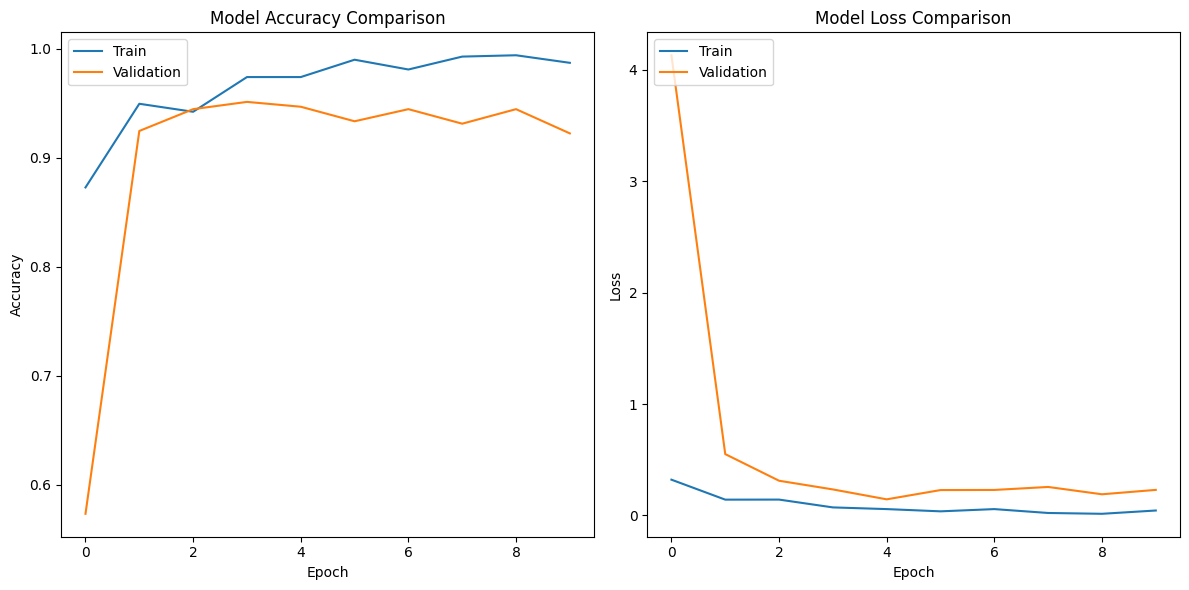

In [79]:
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import InceptionV3
# ... (kode lainnya seperti di atas)
# Train the model
# Plot training history
plt.figure(figsize=(12, 6))
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
# Show plots
plt.tight_layout()
plt.show()

In [80]:
history.history['accuracy']

[0.872653067111969,
 0.9493877291679382,
 0.9420408010482788,
 0.9738775491714478,
 0.9738775491714478,
 0.9897959232330322,
 0.9808163046836853,
 0.9926530718803406,
 0.9938775300979614,
 0.9869387745857239]

In [81]:
history.history['val_accuracy']

[0.5733333230018616,
 0.9244444370269775,
 0.9444444179534912,
 0.9511111378669739,
 0.9466666579246521,
 0.9333333373069763,
 0.9444444179534912,
 0.9311110973358154,
 0.9444444179534912,
 0.9222221970558167]

In [82]:
# Evaluate the model on the validation set
evaluation = model.evaluate(valid_generator)
# Print the evaluation results
print(f"Validation Loss: {evaluation[0]}")
print(f"Validation Accuracy: {evaluation[1]}")

15/15 [==============================] - 0s 24ms/step - loss: 0.2299 - accuracy: 0.9222
Validation Loss: 0.2298515886068344
Validation Accuracy: 0.9222221970558167


15/15 [==============================] - 1s 32ms/step - loss: 0.2299 - accuracy: 0.9222
Validation Loss: 0.22985100746154785
Validation Accuracy: 0.9222221970558167
15/15 [==============================] - 1s 20ms/step


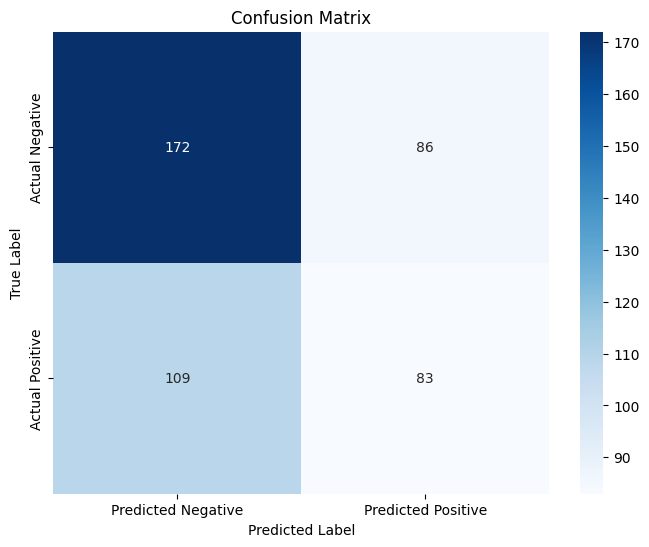

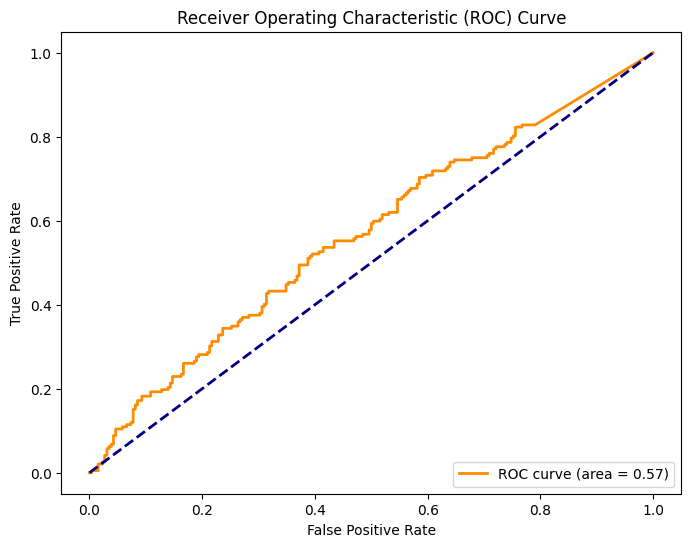

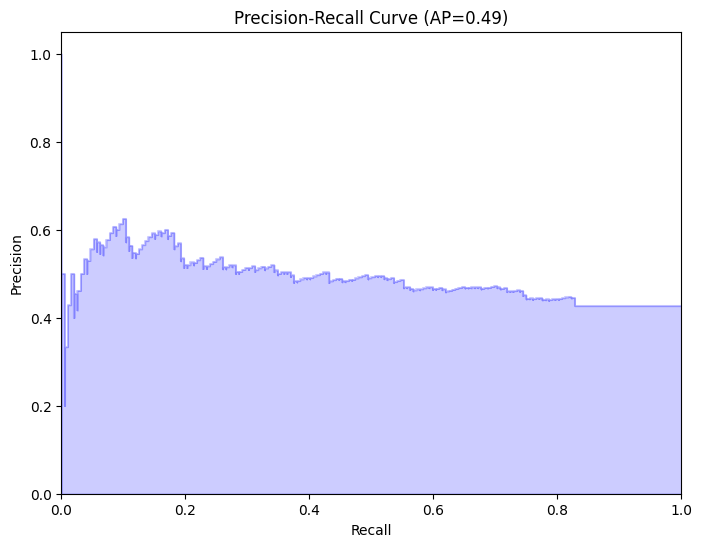

In [84]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Evaluate the model on the validation set
evaluation = model.evaluate(valid_generator)
# Print the evaluation results
print(f"Validation Loss: {evaluation[0]}")
print(f"Validation Accuracy: {evaluation[1]}")
# Plot the confusion matrix
true_labels = valid_generator.classes
predictions = model.predict(valid_generator)
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]
conf_matrix = confusion_matrix(true_labels, binary_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
 xticklabels=['Predicted Negative', 'Predicted Positive'],
 yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(true_labels, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(true_labels, predictions)
average_precision = average_precision_score(true_labels, predictions)
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve (AP={0:.2f})'.format(average_precision))
plt.show()

In [85]:
model.save("model_saved/experimen-inception-v3.h5")

/home/insomnius/.pyenv/versions/3.11.6/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
